<a href="https://colab.research.google.com/github/suryapratapkhuntia/Machine-Learning-End_to_end_project/blob/main/Logistic_Regression_using_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=100, n_features=10, n_informative=5,
                           n_redundant=0, n_clusters_per_class=1, random_state=1)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X, y)


y_pred_sklearn = lr.predict(X)
acc_sklearn = accuracy_score(y, y_pred_sklearn)
print(f"Scikit-learn Accuracy: {acc_sklearn:.4f}")

Scikit-learn Accuracy: 0.9800


In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gd(X, y, lr=0.1, epochs=10000):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.zeros(X.shape[1])
    m = X.shape[0]

    for i in range(epochs):
        z = np.dot(X, weights)
        yhat = sigmoid(z)
        grad = np.dot(X.T, (yhat - y)) / m
        weights -= lr * grad
    return weights


weights = gd(X, y)


X_bias = np.insert(X, 0, 1, axis=1)
yhat_custom = sigmoid(np.dot(X_bias, weights))
y_pred_custom = (yhat_custom >= 0.5).astype(int)

acc_custom = accuracy_score(y, y_pred_custom)
print(f"Custom GD Accuracy: {acc_custom:.4f}")

Custom GD Accuracy: 0.9900


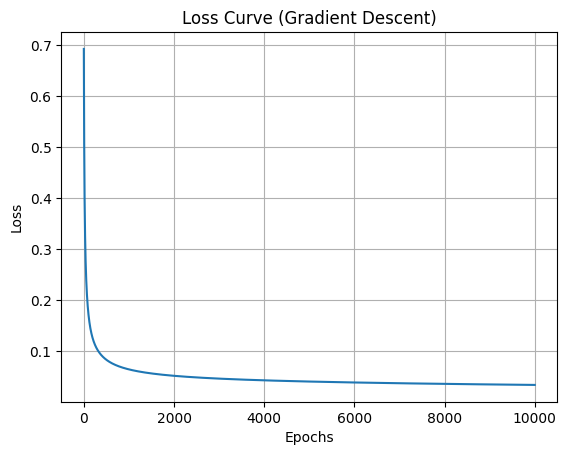

In [7]:
def compute_loss(y, yhat):
    return -np.mean(y * np.log(yhat + 1e-15) + (1 - y) * np.log(1 - yhat + 1e-15))

def gd_with_loss(X, y, lr=0.1, epochs=10000):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.zeros(X.shape[1])
    m = X.shape[0]
    losses = []

    for i in range(epochs):
        z = np.dot(X, weights)
        yhat = sigmoid(z)
        grad = np.dot(X.T, (yhat - y)) / m
        weights -= lr * grad
        losses.append(compute_loss(y, yhat))
    return weights, losses

weights, losses = gd_with_loss(X, y)


plt.plot(losses)
plt.title("Loss Curve (Gradient Descent)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

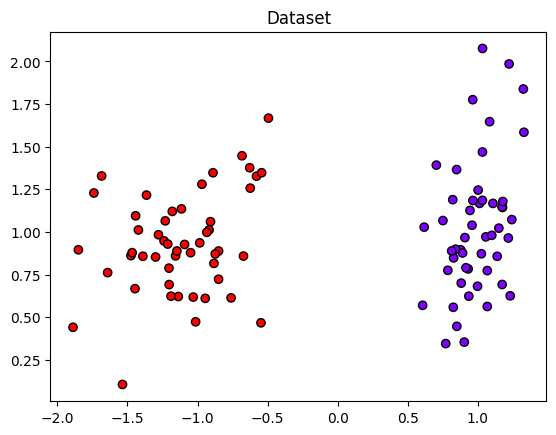

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=1)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolor='k')
plt.title("Dataset")
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr.fit(X, y)


a = lr.coef_[0][0]
b = lr.coef_[0][1]
c = lr.intercept_[0]


x_input = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
y_input_sklearn = -(a * x_input + c) / b

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gd(X, y, lr=0.1, epochs=10000):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.zeros(X.shape[1])
    m = X.shape[0]

    for i in range(epochs):
        z = np.dot(X, weights)
        yhat = sigmoid(z)
        grad = np.dot(X.T, (yhat - y)) / m
        weights -= lr * grad
    return weights


weights = gd(X, y)


y_input_gd = -(weights[1] * x_input + weights[0]) / weights[2]

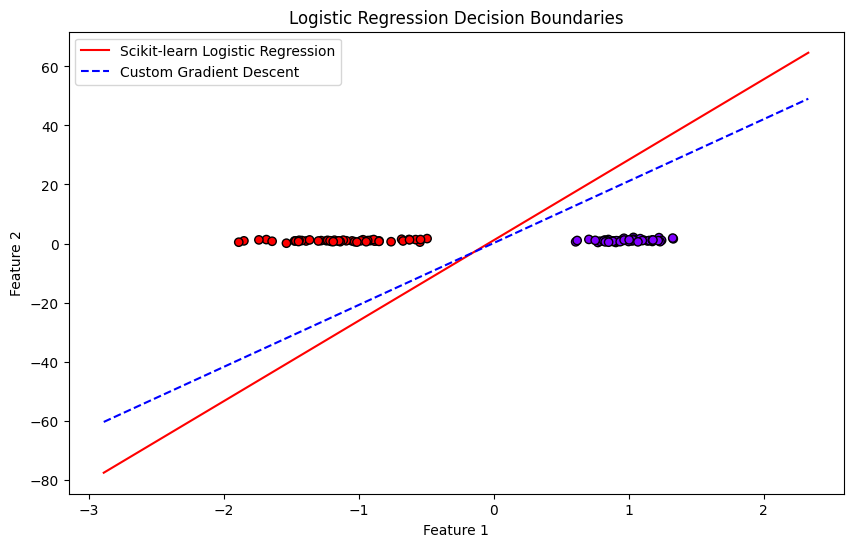

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolor='k')

plt.plot(x_input, y_input_sklearn, color='red', label="Scikit-learn Logistic Regression")
plt.plot(x_input, y_input_gd, color='blue', linestyle="--", label="Custom Gradient Descent")

plt.legend()
plt.title("Logistic Regression Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()